# Convolution

Dot Product: 556
Dot Product: 749.6634442624979


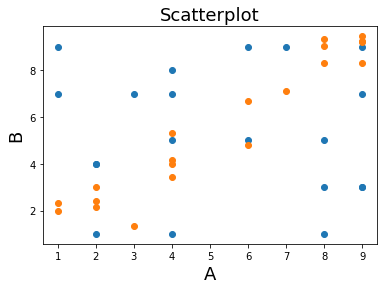

In [2]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

a = np.random.randint(1,10,20)
b = np.random.randint(1,10,20)

#the two vectors need to be of the same length. 20个对应的向量点

plt.scatter(a,b)
plt.ylabel('B', fontsize=18)
plt.xlabel('A', fontsize=18)
plt.title('Scatterplot', fontsize=18)

print('Dot Product: %s' % np.dot(a,b))
 
#add gaussian noise on top of one of the vectors

b = a + np.random.randn(20)
plt.scatter(a,b)
plt.ylabel('B', fontsize=18)
plt.xlabel('A', fontsize=18)
plt.title('Scatterplot', fontsize=18)

print(f'Dot Product: {np.dot(a,b)}')

Text(0.5, 1.0, 'Kernel ')

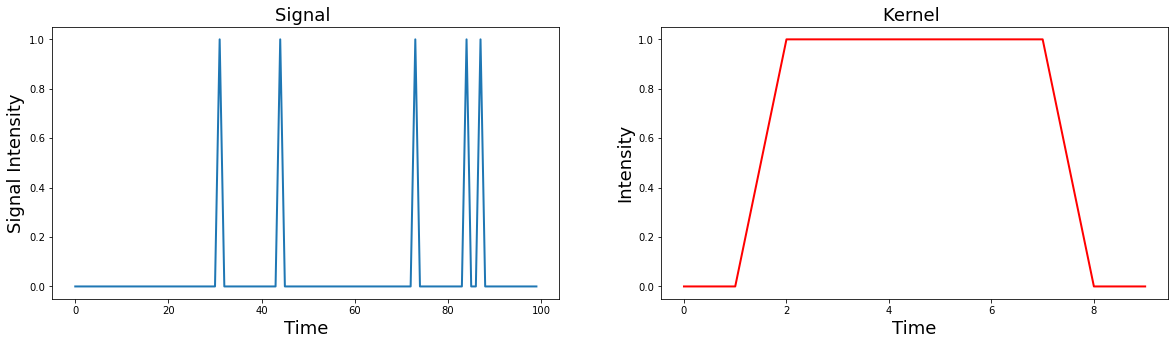

In [3]:
n_samples = 100

signal = np.zeros(n_samples)
signal[np.random.randint(0 ,n_samples, 5)] = 1
# one signal weights each time point of the other signal and then slides forward over time.
#  call the timeseries variable signal and the other vector the kernel.
# kernel will almost always be smaller than the signal

kernel = np.zeros(10)
kernel[2:8] = 1
#周围的包括自己的十个数据进行卷积，所以最后一个signal后要加9个卷积数据

f,a = plt.subplots(ncols=2, figsize=(20,5))
a[0].plot(signal, linewidth=2)
a[0].set_xlabel('Time', fontsize=18)
a[0].set_ylabel('Signal Intensity', fontsize=18)
a[0].set_title('Signal ', fontsize=18)
a[1].plot(kernel, linewidth=2, color='red')
a[1].set_xlabel('Time', fontsize=18)
a[1].set_ylabel('Intensity', fontsize=18)
a[1].set_title('Kernel ', fontsize=18)

Text(0.5, 1.0, 'Time Shifted Kernels')

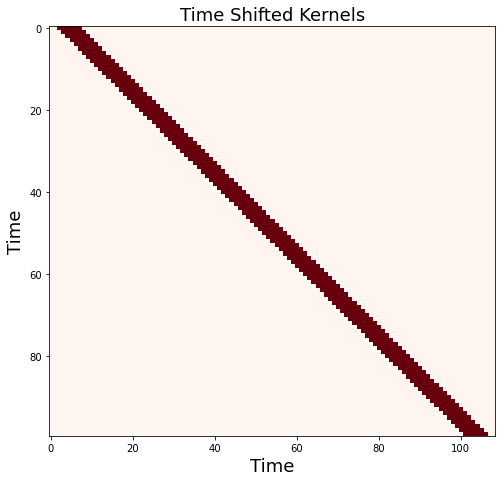

In [4]:
shifted_kernel = np.zeros((n_samples, n_samples+len(kernel) - 1))
for i in range(n_samples):
    shifted_kernel[i, i:i+len(kernel)] = kernel

plt.figure(figsize=(8, 8))
plt.imshow(shifted_kernel, cmap='Reds')
plt.xlabel('Time', fontsize=18)
plt.ylabel('Time', fontsize=18)
plt.title('Time Shifted Kernels', fontsize=18)

Text(0.5, 1.0, 'Signal convolved with boxcar kernel')

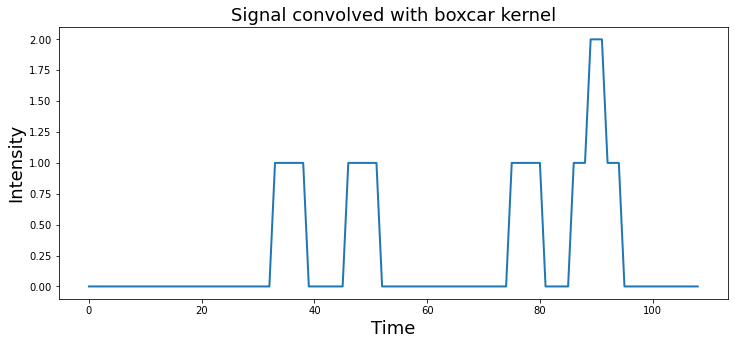

In [5]:
convolved_signal = np.dot(signal, shifted_kernel)

# this is simply moving the boxcar kernel, which is 6 seconds in duration forward in time for each sample

plt.figure(figsize=(12, 5))
plt.plot(convolved_signal, linewidth=2)
plt.ylabel('Intensity', fontsize=18)
plt.xlabel('Time', fontsize=18)
plt.title('Signal convolved with boxcar kernel', fontsize=18)

In [6]:
print(f"Signal Length: {len(signal)}")
print(f"Kernel Length: {len(kernel)}")
print(f"Convolved Signal Length: {len(convolved_signal)}")

Signal Length: 100
Kernel Length: 10
Convolved Signal Length: 109


Text(0.5, 1.0, 'Signal convolved with boxcar kernel')

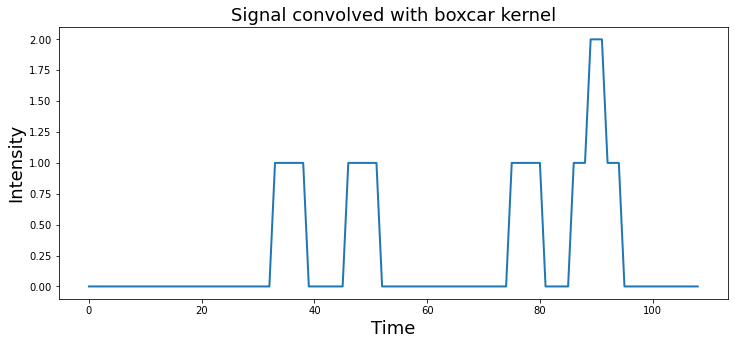

In [7]:
plt.figure(figsize=(12, 5))
plt.plot(np.convolve(signal, kernel), linewidth=2)
plt.ylabel('Intensity', fontsize=18)
plt.xlabel('Time', fontsize=18)
plt.title('Signal convolved with boxcar kernel', fontsize=18)

Text(0.5, 0, 'Time')

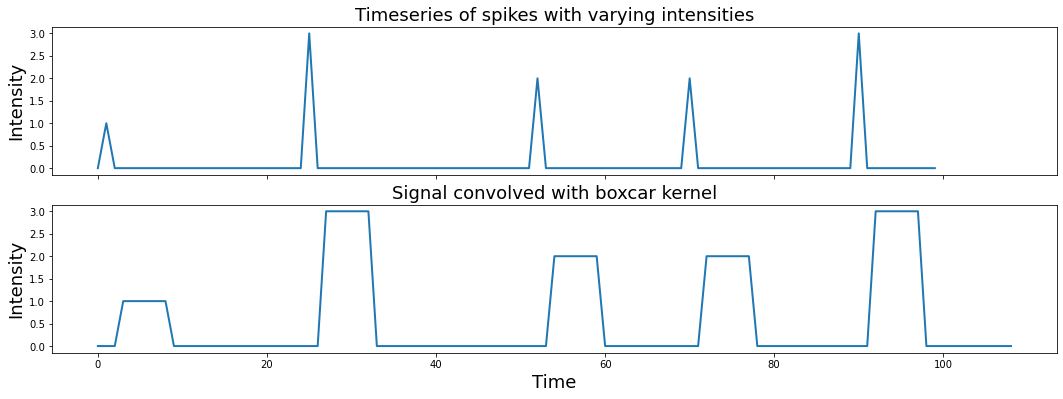

In [8]:
signal = np.zeros(n_samples)
signal[np.random.randint(0,n_samples,5)] = np.random.randint(1,5,5)

f,a = plt.subplots(nrows=2, figsize=(18,6), sharex=True)
a[0].plot(signal, linewidth=2)
a[0].set_ylabel('Intensity', fontsize=18)
a[0].set_title('Timeseries of spikes with varying intensities', fontsize=18)
a[1].plot(np.convolve(signal, kernel), linewidth=2)
a[1].set_ylabel('Intensity', fontsize=18)
a[1].set_title('Signal convolved with boxcar kernel', fontsize=18)
a[1].set_xlabel('Time', fontsize=18)

Text(0.5, 1.0, 'Hemodynamic Response Function')

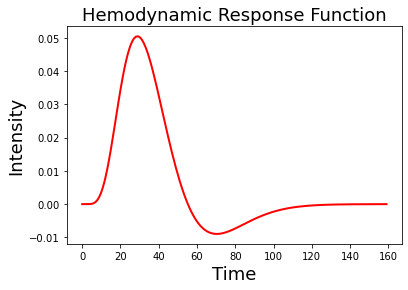

In [11]:
from nltools.external import glover_hrf

tr = 2
hrf = glover_hrf(tr, oversampling=10)
plt.plot(hrf, linewidth=2, color='red')
plt.ylabel('Intensity', fontsize=18)
plt.xlabel('Time', fontsize=18)
plt.title('Hemodynamic Response Function', fontsize=18)

Text(0.5, 1.0, 'Hemodynamic Response Function')

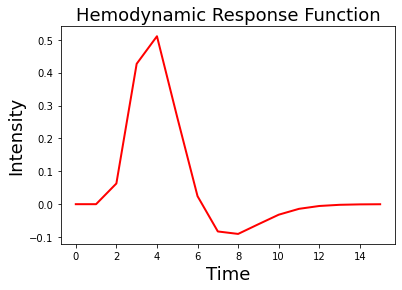

In [10]:
hrf = glover_hrf(tr, oversampling=1)
plt.plot(hrf, linewidth=2, color='red')
plt.ylabel('Intensity', fontsize=18)
plt.xlabel('Time', fontsize=18)
plt.title('Hemodynamic Response Function', fontsize=18)

Text(0.5, 1.0, 'Signal convolved with HRF kernel')

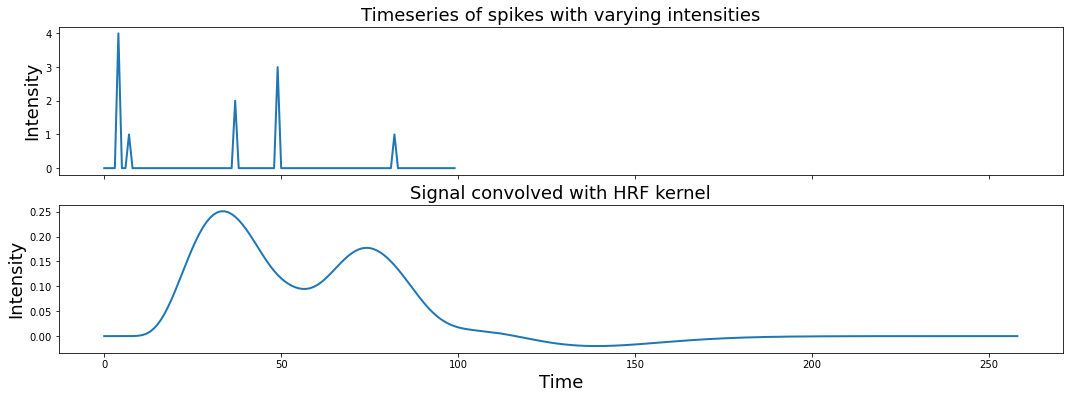

In [12]:
signal = np.zeros(n_samples)
signal[np.random.randint(0,n_samples,5)] = np.random.randint(1,5,5)

f,a = plt.subplots(nrows=2, figsize=(18,6), sharex=True)
a[0].plot(signal, linewidth=2)
a[1].plot(np.convolve(signal, hrf), linewidth=2)
a[0].set_ylabel('Intensity', fontsize=18)
a[0].set_title('Timeseries of spikes with varying intensities', fontsize=18)
a[1].set_ylabel('Intensity', fontsize=18)
a[1].set_xlabel('Time', fontsize=18)
a[1].set_title('Signal convolved with HRF kernel', fontsize=18)

# Oscillations

Text(0, 0.5, 'Amplitude')

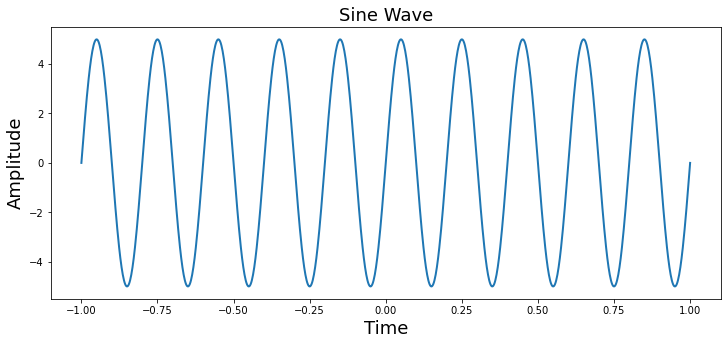

In [15]:
from numpy import sin, pi, arange

sampling_freq = 500
time = arange(-1, 1 + 1/sampling_freq, 1/sampling_freq)
amplitude = 5
freq = 5
theta = 0

simulation = amplitude * sin(2 * pi * freq * time + theta)

plt.figure(figsize=(12, 5))
plt.plot(time, simulation, linewidth=2)
plt.title('Sine Wave', fontsize=18)
plt.xlabel('Time', fontsize=18)
plt.ylabel('Amplitude', fontsize=18)

interactive(children=(FloatSlider(value=5.0, description='amplitude', max=10.0, step=0.5), FloatSlider(value=5…

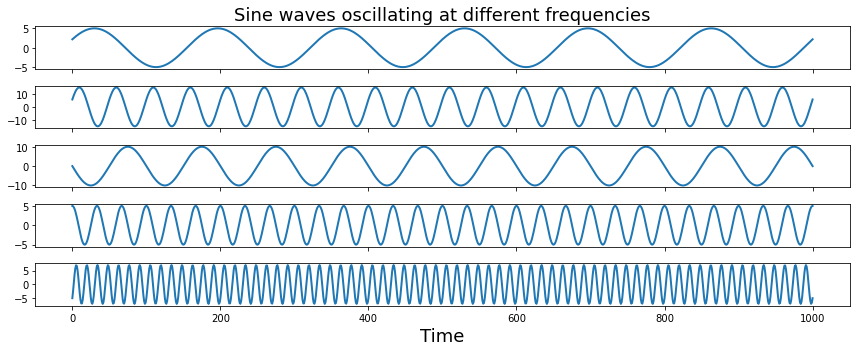

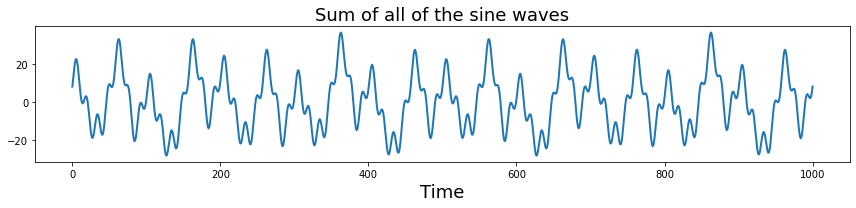

In [16]:
from ipywidgets import interact, FloatSlider
from numpy import sin, pi, arange, real, imag

def plot_oscillation(amplitude=5, frequency=5, theta=1):
    sampling_frequency=500
    time = arange(-1, 1 + 1/sampling_frequency, 1/sampling_frequency)
    simulation = amplitude * sin(2 * pi * frequency * time + theta)
    z = np.exp(1j*(2 * pi * frequency * time + theta))

    fig = plt.figure(figsize=(20, 4))
    gs = plt.GridSpec(1, 6, left=0.05, right=0.48, wspace=0.05)
    ax1 = fig.add_subplot(gs[0, :4])
    ax1.plot(time, simulation, linewidth=2)
    ax1.set_ylabel('Amplitude', fontsize=18)
    ax1.set_xlabel('Time', fontsize=18)
    ax2 = fig.add_subplot(gs[0, 5:], polar=True)
    ax2.plot(real(simulation), imag(simulation))
    plt.tight_layout()

interact(plot_oscillation, amplitude=FloatSlider(value=5, min=0, max=10, step=0.5),
         frequency=FloatSlider(value=5, min=0, max=10, step=0.5), 
         theta=FloatSlider(value=0, min=-5, max=5, step=0.5))
sampling_freq = 500

freq = [3, 10, 5 ,15, 35]
amplitude = [5, 15, 10, 5, 7]
phases = pi*np.array([1/7, 1/8, 1, 1/2, -1/4])

time = arange(-1, 1 + 1/sampling_freq, 1/sampling_freq) 

sine_waves = []
for i,f in enumerate(freq):
    sine_waves.append(amplitude[i] * sin(2*pi*f*time + phases[i]))
sine_waves = np.array(sine_waves)


f,a = plt.subplots(nrows=5, ncols=1, figsize=(12,5), sharex=True)
for i,x in enumerate(freq):
    a[i].plot(sine_waves[i,:], linewidth=2)
a[0].set_title("Sine waves oscillating at different frequencies", fontsize=18)
a[i].set_xlabel("Time", fontsize=18)
plt.tight_layout()    
plt.figure(figsize=(12,3))
plt.plot(np.sum(sine_waves, axis=0), linewidth=2)
plt.xlabel('Time', fontsize=18)
plt.title("Sum of all of the sine waves", fontsize=18)
plt.xlabel("Time", fontsize=18)
plt.tight_layout()

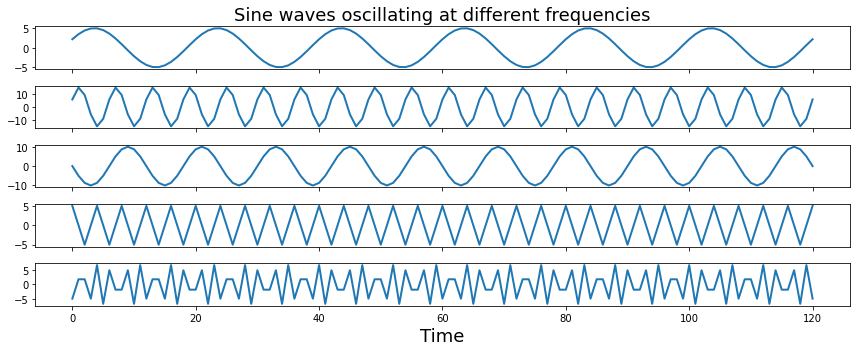

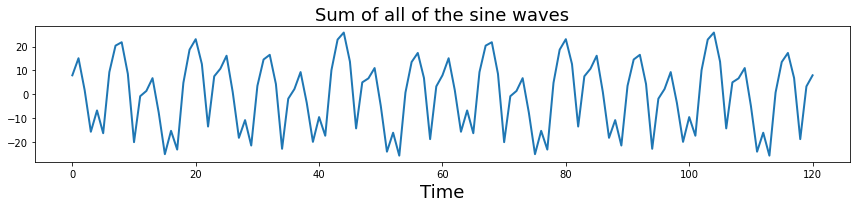

In [17]:
sampling_freq = 60

freq = [3, 10, 5 ,15, 35]
amplitude = [5, 15, 10, 5, 7]
phases = pi*np.array([1/7, 1/8, 1, 1/2, -1/4])

time = arange(-1, 1 + 1/sampling_freq, 1/sampling_freq) 

sine_waves = []
for i,f in enumerate(freq):
    sine_waves.append(amplitude[i] * sin(2*pi*f*time + phases[i]))
sine_waves = np.array(sine_waves)


f,a = plt.subplots(nrows=5, ncols=1, figsize=(12,5), sharex=True)
for i,x in enumerate(freq):
    a[i].plot(sine_waves[i,:], linewidth=2)
a[0].set_title("Sine waves oscillating at different frequencies", fontsize=18)
a[i].set_xlabel("Time", fontsize=18)
plt.tight_layout()    


plt.figure(figsize=(12,3))
plt.plot(np.sum(sine_waves, axis=0), linewidth=2)
plt.title("Sum of all of the sine waves", fontsize=18)
plt.xlabel("Time", fontsize=18)
plt.tight_layout()    

Text(0.5, 0, 'Time')

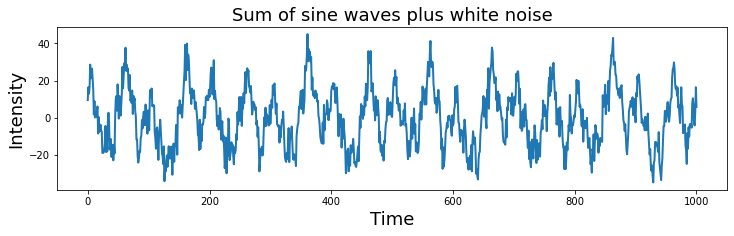

In [18]:
sampling_freq = 500

freq = [3, 10, 5 ,15, 35]
amplitude = [5, 15, 10, 5, 7]
phases = pi*np.array([1/7, 1/8, 1, 1/2, -1/4])

time = arange(-1, 1 + 1/sampling_freq, 1/sampling_freq) 

sine_waves = []
for i,f in enumerate(freq):
    sine_waves.append(amplitude[i] * sin(2*pi*f*time + phases[i]))
sine_waves = np.array(sine_waves)


noise = 5 * np.random.randn(sine_waves.shape[1])
signal = np.sum(sine_waves,axis=0) + noise

plt.figure(figsize=(12,3))
plt.plot( signal, linewidth=2)
plt.title("Sum of sine waves plus white noise", fontsize=18)
plt.ylabel('Intensity', fontsize=18)
plt.xlabel('Time', fontsize=18)